<a href="https://colab.research.google.com/github/Aaryandhage/Aaryandhage/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
medical_chargers_url = "insurance.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas --quiet
from google.colab import files


In [ ]:
import pandas as pd
uploaded = files.upload()

Saving insurance.csv to insurance.csv


:

In [ ]:
medical_df = pd.read_csv("insurance.csv")

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#!pip install jovian


In [ ]:
#import jovian

In [ ]:
"jovian.commit(filename='insurance.ipynb')"

"jovian.commit(filename='insurance.ipynb')"

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distributionn of age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                  color_discrete_sequence=['red'],
                   title='Distributionn of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                  color_discrete_sequence=['green','red'],
                   title='Distributionn of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   color='region',
                  color_discrete_sequence=['green','red'],
                   title='Distributionn of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
px.histogram(medical_df , x= 'smoker' ,color='sex' ,title='smoker')

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='age vs charges')
fig.update_traces(marker_size=8)
fig.show()



In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI vs charges')
fig.update_traces(marker_size=5)
fig.show()


In [ ]:

px.violin(medical_df , x='children' ,y='charges')

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [ ]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
smoker_values ={'no':0 , 'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [ ]:
medical_df.smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [ ]:
# Calculate the correlation matrix, ignoring non-numeric columns
correlation_matrix = medical_df.corr(numeric_only=True)

# Display the correlation matrix
# Removed the line medical_df.corr() that caused the error
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
px.scatter(medical_df, x ='age', y ='age')

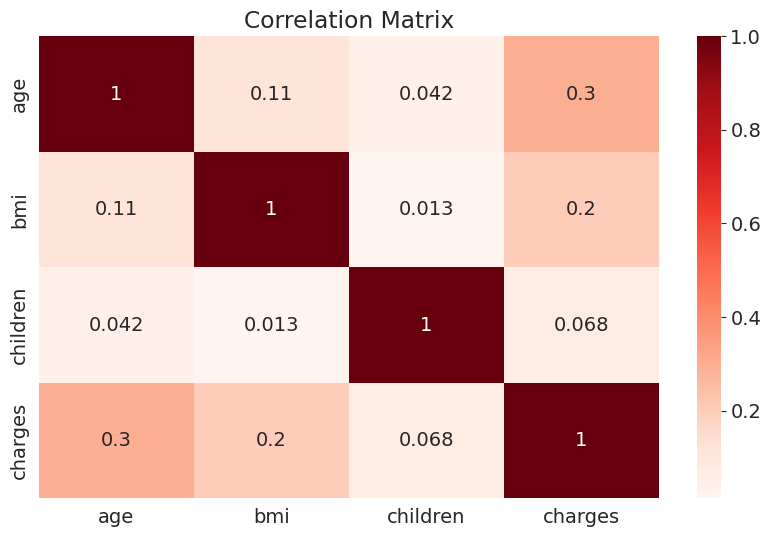

In [ ]:

# Select only numeric columns
numeric_df = medical_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'jovian.commit(fileame=insurace.ipynb)'

'jovian.commit(fileame=insurace.ipynb)'

In [ ]:
smoker_df = medical_df[medical_df.smoker=='yes']

In [ ]:
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [ ]:
non_smoker_df = medical_df[medical_df.smoker=='no']

In [ ]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


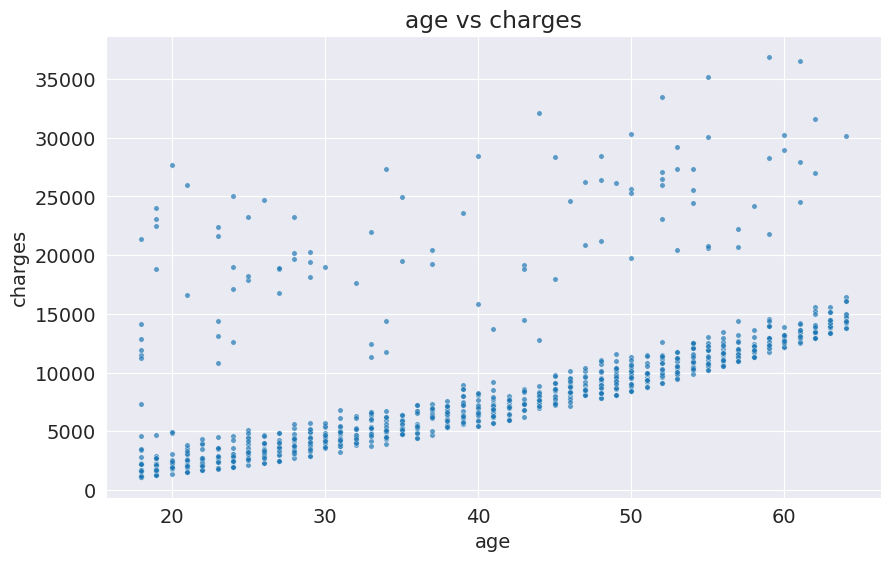

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('age vs charges')
sns.scatterplot(data=non_smoker_df, x='age',y='charges', alpha=0.7 , s=15);

In [ ]:
def estimate_charges(ages,w,b):
    return w*ages+b

In [ ]:
w=50
b=100

In [ ]:
estimate_charges(30,w,b)

1600

In [ ]:
ages = non_smoker_df.age
ages

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
non_smoker_df.charges


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


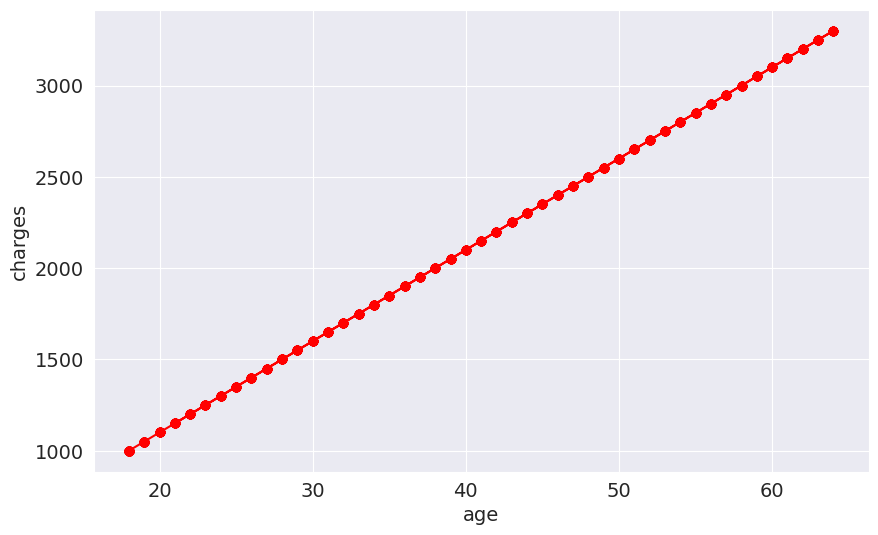

In [ ]:
import matplotlib.pyplot as plt # Make sure you have this import in a previous cell

# Assuming 'ages' and 'estimated_charges' variables are defined in previous cells

plt.plot(ages, estimated_charges, 'r-o');

# Corrected lines: Call plt.xlabel and plt.ylabel as functions
plt.xlabel('age');
plt.ylabel('charges');

In [ ]:
type(estimated_charges)

pandas.core.series.Series

In [ ]:
import matplotlib.pyplot as plt

# Any potentially problematic assignments here?

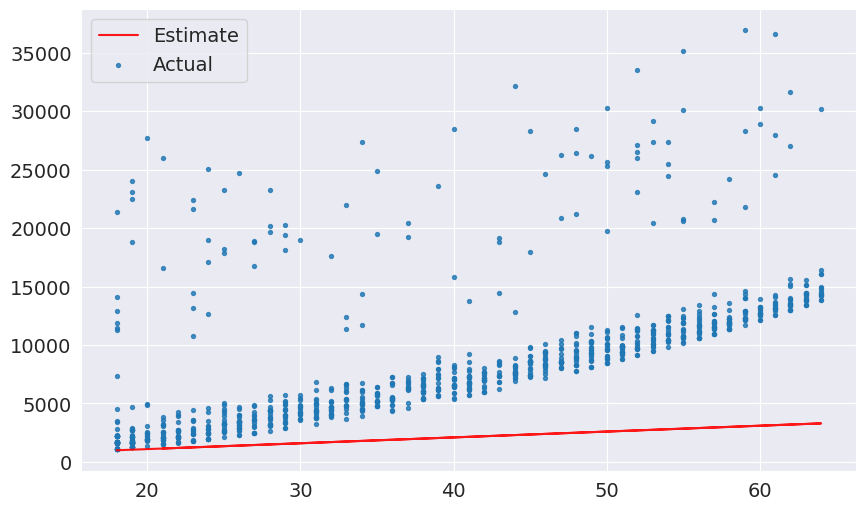

In [ ]:
target = non_smoker_df.charges
plot = plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8);

plt.legend(['Estimate','Actual']);

In [ ]:
import matplotlib.pyplot as plt

# Assuming `non_smoker_df` exists and has columns 'age' and 'charges'
def try_parameter(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()  # Ensure that the plot is shown

# You may call try_parameter() with the appropriate arguments for w and b


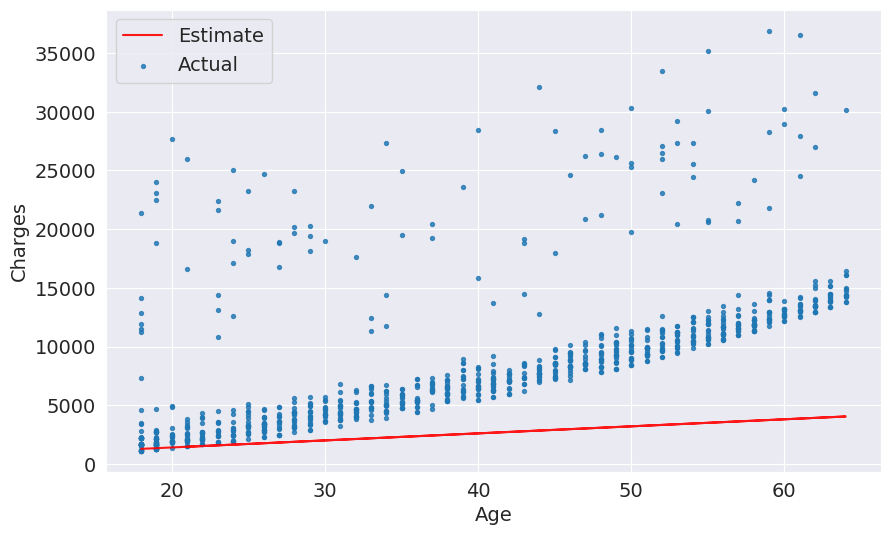

In [ ]:
try_parameter(60,200);

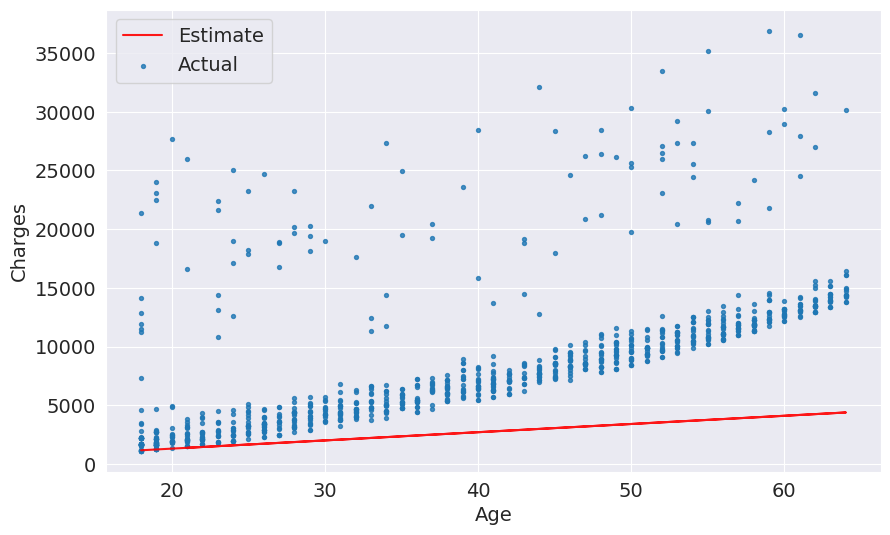

In [ ]:
try_parameter(70,-100);

In [ ]:
target = non_smoker_df.charges
target


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predications = estimated_charges
predications

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [ ]:
!pip install numpy

In [ ]:
import numpy as np

In [ ]:
def rsme ( target , predicitions):
    return np.sqrt(np.mean(np.square(target - predicitions)))


In [ ]:
w = 50
b = 100

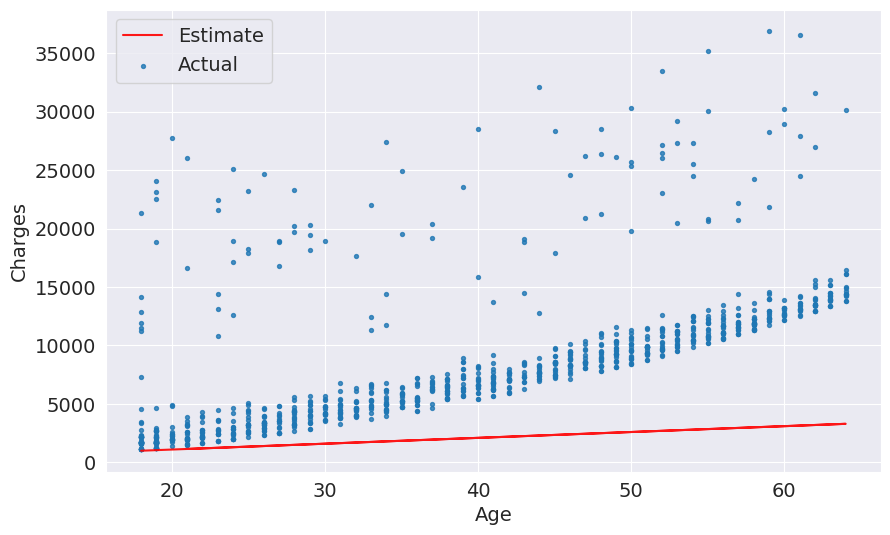

In [ ]:
try_parameter(w,b);

In [ ]:
targets = non_smoker_df['charges']
predicated = estimate_charges(non_smoker_df.age,w,b)

In [ ]:
rsme(targets , predicated)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  # Corrected typo: predicitions -> predictions
  predictions = estimate_charges(non_smoker_df.age,w,b)

  # Corrected typo: predications -> predictions
  # Corrected typo: alpha-0.8 -> alpha=0.8
  plt.plot(ages,predictions,'r', alpha=0.8);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Prediction','Actual'])

  # Corrected typo: predicitions -> predictions
  loss=rsme(target,predictions)
  print('Rsme loss:',loss)

Rsme loss: 8312.556156041677


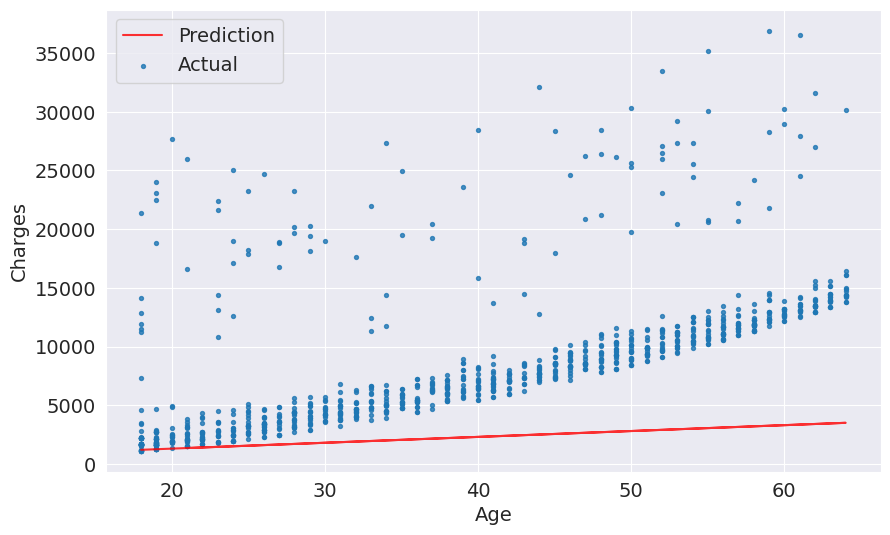

In [ ]:
try_parameters(50, 300)

Rsme loss: 4991.993804156943


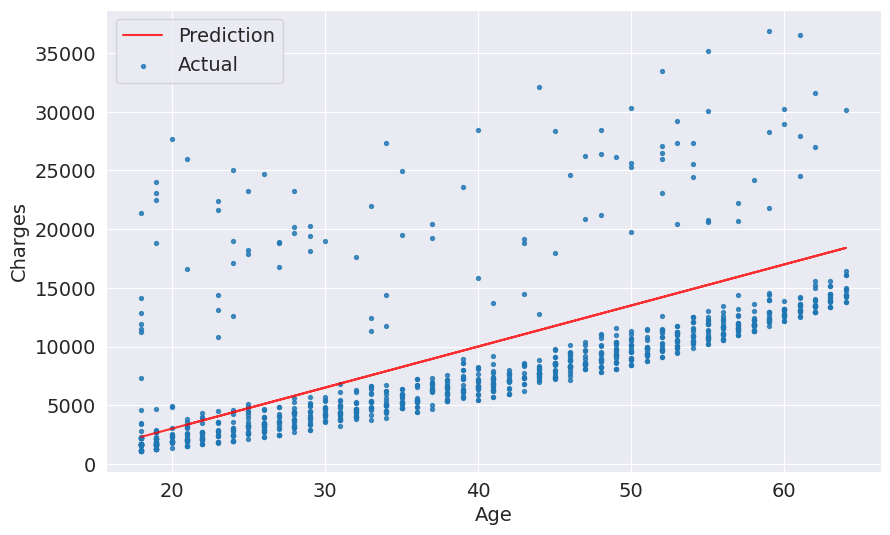

In [ ]:
try_parameters(350, -4000)

In [ ]:
   !pip install scikit-learn
   from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :',inputs.shape)
print('targets.shape :',targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predications = model.predict(inputs)

In [ ]:
predications

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
targets


,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
rsme(targets,predications)

np.float64(4662.505766636395)

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

In [ ]:
#create inputs and targests

inputs, targets=non_smoker_df[['age']] , non_smoker_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predicitions

predicitions = model.predict(inputs)

#computing
loss = rsme(target, predicitions)
print(loss)

4662.505766636395


Linear regreession using Multiple features

In [ ]:
#create inputs and targests

inputs, targets=non_smoker_df[['age','bmi']] , non_smoker_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predicitions

predicitions = model.predict(inputs)

#computing
loss = rsme(target, predicitions)
print(loss)



4662.3128354612945


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [ ]:
fig = px.scatter(non_smoker_df,
                 x='bmi',
                 y='charges',
                title = 'Bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
inputs, targets=non_smoker_df[['bmi']] , non_smoker_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predicitions

predicitions = model.predict(inputs)

#computing
loss = rsme(targets, predicitions)
print(loss)


5969.772531913293


In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542192)

In [ ]:
fig = px.strip ( non_smoker_df , x='children' , y='charges', title='children vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#create inputs and targests

inputs, targets=non_smoker_df[['bmi','age','children']] , non_smoker_df['charges'] # Use 'bmi' as the input feature

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs) # Corrected typo from predicitions

#computing
loss = rsme(targets, predictions) # Use 'targets' and 'predictions' for calculating loss
print(loss)

4608.470405038247


In [ ]:
#create inputs and targests

# Ensure inputs and targets are from the same DataFrame (smoker_df)
inputs, targets = smoker_df[['bmi','age','children']], smoker_df['charges'] # Use 'bmi' as the input feature and get targets from smoker_df

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs) # Corrected typo from predicitions

#computing
loss = rsme(targets, predictions) # Use 'targets' and 'predictions' for calculating loss
print(loss)

5718.202480524154


In [ ]:
#create inputs and targests

# Ensure inputs and targets are from the same DataFrame (smoker_df)
inputs, targets = smoker_df[['bmi']], smoker_df['charges'] # Use 'bmi' as the input feature and get targets from smoker_df

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs) # Corrected typo from predicitions

#computing
loss = rsme(targets, predictions) # Use 'targets' and 'predictions' for calculating loss
print(loss)

6811.59740830196


In [ ]:
#create inputs and targets

# Select inputs and targets from the entire medical_df
inputs, targets = medical_df[['bmi','age','children']], medical_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs)

#computing
loss = rsme(targets, predictions)
print(loss)

11355.317901125973


In [ ]:
px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker')


Using categorical for ML

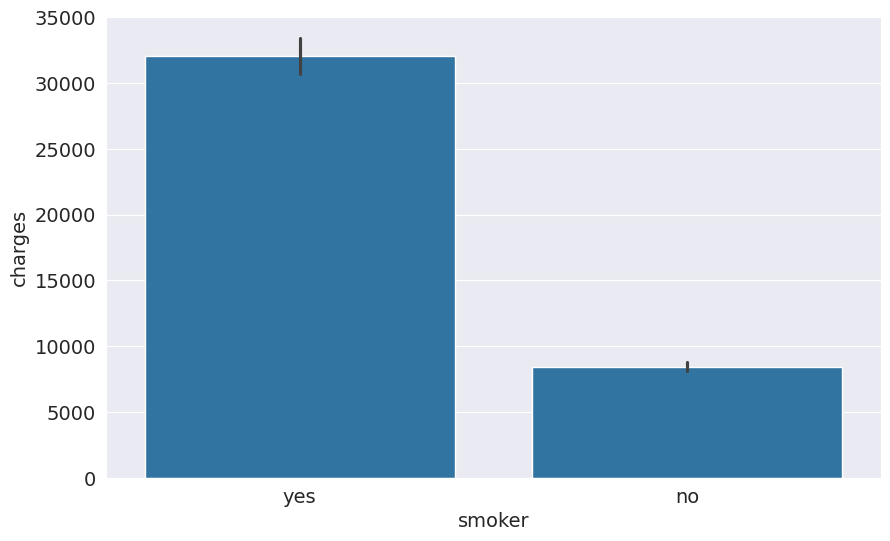

In [ ]:
sns.barplot( medical_df, x='smoker', y='charges' );
plt.show()

In [ ]:
smoker_codes = { 'no' : 0 , 'yes' : 1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
smoker_codes

{'no': 0, 'yes': 1}

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:

# Select inputs and targets from the entire medical_df
inputs, targets = medical_df[['bmi','age','children','smoker_code']], medical_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs)

#computing
loss = rsme(targets, predictions)
print(loss)


6056.439217188081


In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
_

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
enc.transform([['northeast'],['northwest']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [ ]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
# Select inputs and targets from the entire medical_df
inputs, targets = medical_df[['bmi','age','children','smoker_code','northeast','northwest','southeast','southwest']], medical_df['charges']

#creating and training a model

model = LinearRegression().fit(inputs, targets)

#Generate predictions

predictions = model.predict(inputs)

#computing
loss = rsme(targets, predictions)
print(loss)


6042.033215394104


Feature Scaling

---



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols=['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols  =['smoker_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

KeyError: 0

In [ ]:
# prompt: train the model

# Combine scaled numeric features with categorical features
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
targets = medical_df.charges

# Create and train a model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Computing the loss
loss = rsme(targets, predictions)
print('Loss with scaled features:', loss)

Loss with scaled features: 6042.033215394104


In [ ]:
 new_customer = [[28,30,2,1,0,1,0,0.]]

In [ ]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1,0,1,0,0.]])

array([29798.18088493])